In [1]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

# Se importan paquetes de análisis de datos- Proceso

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

BaseVentasFusionAgro = pd.read_csv("11.csv")

# Se importan categorías de producto, cultivo y cliente

Zona = pd.read_csv("Zona.csv")

Producto = pd.read_csv("Producto.csv")

Cultivo = pd.read_csv("Cultivo.csv")

Mesatrimestre = pd.read_csv("Mesatrimestre.csv")


# Se incluyen las categorías en la base

Ventas_zona = BaseVentasFusionAgro.merge(Zona, how='left', left_on='RM/ REIQ', right_on='RM/ REIQ_')

Ventas_zona_producto = Ventas_zona.merge(Producto, how='left', left_on='Producto_', right_on='Producto_')

Ventas_zona_producto_ = Ventas_zona_producto.merge(Mesatrimestre, how='left', left_on='Mes', right_on='Mes')

Ventas_zona_producto_cultivo = Ventas_zona_producto_.merge(Cultivo, how='left', left_on='Cultivo_', right_on='Cultivo', indicator = True)

# Columnas disponibles

Producto.columns
Cultivo.columns
Zona.columns

# Listado de zonas y categorías de cultivos disponibles

Ventas_zona_producto_cultivo['Zona Ranking_'].unique()

Ventas_zona_producto_cultivo['Cultivo_Categoría'].unique()

Ventas_zona_producto_cultivo['Periodo'].unique()

Ventas_zona_producto_cultivo['Trimestre'].unique()

#Columnas auxiliares

Ventas_zona_producto_cultivo['Utilidad $M'] = Ventas_zona_producto_cultivo['Utilidad']/1000000

Ventas_zona_producto_cultivo['Utilidad/Utilidad_total (%)'] = Ventas_zona_producto_cultivo['Utilidad']*100/(Ventas_zona_producto_cultivo['Utilidad'].sum())




Toggle code

In [2]:
#Criterios para filtrar datos

Periodoconsiderado_2022 = Ventas_zona_producto_cultivo['Periodo'] == 2022
Periodoconsiderado2021 = Ventas_zona_producto_cultivo['Periodo'] == 2021
Periodoconsiderado2021 = Ventas_zona_producto_cultivo['Periodo'] == 2020
Zonaconsiderada_Noroeste = Ventas_zona_producto_cultivo['Zona Ranking_'] == "01 Noroeste"
ZonaconsideradaZona2 = Ventas_zona_producto_cultivo['Zona Ranking_'] == "03 Zona 2"
ZonaconsideradaPacífico = Ventas_zona_producto_cultivo['Zona Ranking_'] == "02 Pacífico"
EmpresaconsideradaMéxico = Ventas_zona_producto_cultivo['Empresa'] == "México"
T1 = ['T1']
T1yT2 = ['T1', 'T2']
T1aT4 = ['T1', 'T2','T3', 'T4']
Catdecultivo = Ventas_zona_producto_cultivo['Cultivo_Categoría'] == "Hortalizas"
AdmCat_Cito = Ventas_zona_producto_cultivo['Administracion de la categoria'] == "1 Cito"
AdmCat_Suelo = Ventas_zona_producto_cultivo['Administracion de la categoria'] == "2 Raiz/ suelo"
AdmCat_Bioest = Ventas_zona_producto_cultivo['Administracion de la categoria'] == "3 Bioestimulante"
AdmCat_Coady = Ventas_zona_producto_cultivo['Administracion de la categoria'] == "4 Coadyuvante"
H2 = Ventas_zona_producto_cultivo['H1 o H2 o Resto'] == "H2"


# Plan del primer trimestre 2022 de México

In [3]:

# Plan 2022 corresponde al año 2022, también es posible seleccionar 2020 o 2021

Ventas_zona_producto_cultivo_2022 = Ventas_zona_producto_cultivo[Ventas_zona_producto_cultivo['Trimestre'].isin(
    T1) &
    Periodoconsiderado_2022 & 
    EmpresaconsideradaMéxico ]

Ventas_zona_producto_cultivo_Cito_2022 = Ventas_zona_producto_cultivo[Ventas_zona_producto_cultivo['Trimestre'].isin(
    T1) &
    Periodoconsiderado_2022 & 
    EmpresaconsideradaMéxico &
    AdmCat_Cito]
Ventas_zona_producto_cultivo_Suelo_2022 = Ventas_zona_producto_cultivo[Ventas_zona_producto_cultivo['Trimestre'].isin(
    T1) &
    Periodoconsiderado_2022 & 
    EmpresaconsideradaMéxico &
    AdmCat_Suelo]
Ventas_zona_producto_cultivo_Bioest_2022 = Ventas_zona_producto_cultivo[Ventas_zona_producto_cultivo['Trimestre'].isin(
    T1) &
    Periodoconsiderado_2022 & 
    EmpresaconsideradaMéxico &
    AdmCat_Bioest]
Ventas_zona_producto_cultivo_Coady_2022 = Ventas_zona_producto_cultivo[Ventas_zona_producto_cultivo['Trimestre'].isin(
    T1) &
    Periodoconsiderado_2022 & 
    EmpresaconsideradaMéxico &
    AdmCat_Coady]

# Utilidad total y desglose por categoría

In [4]:

print ('${:,.3f} M'.format(Ventas_zona_producto_cultivo_2022['Utilidad'].sum()/1000000) )

$41.368 M


In [5]:
Desgloseporhorizonte_ = Ventas_zona_producto_cultivo_2022.groupby(
                                                ['Administracion de la categoria']
                                        ).agg(
                                                {'Utilidad $M': 'sum'}).style.bar(subset=['Utilidad $M'], color='red')
display(Desgloseporhorizonte_)

,Utilidad $M
Administracion de la categoria,
1 Cito,15.172983
2 Raiz/ suelo,10.922763
3 Bioestimulante,6.966584
4 Coadyuvante,6.086520
5 GA,0.325754
6 Nutrici�n,1.893341


In [6]:
Desgloseporhorizonte_ = Ventas_zona_producto_cultivo_2022.groupby(
                                                ['H1 o H2 o Resto']
                                        ).agg(
                                                {'Utilidad $M': 'sum'}).style.bar(subset=['Utilidad $M'], color='red')
display(Desgloseporhorizonte_)

,Utilidad $M
H1 o H2 o Resto,
H1,31.159121
H2,5.007264
Resto,5.201561


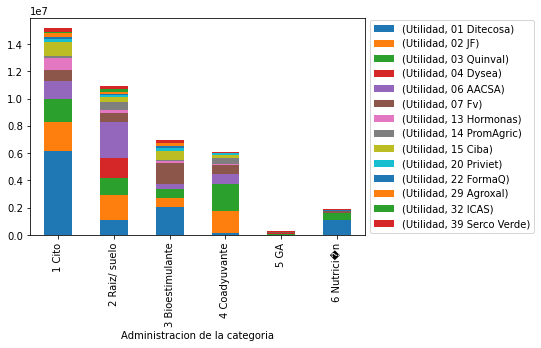

In [7]:

# Plan 2022 desglosado por cliente y categoría

Utilidadporclienteycategoria = Ventas_zona_producto_cultivo_2022.groupby(
                                                ['Administracion de la categoria','RM/ REIQ_Ranking']
                                        ).agg(
                                                {'Utilidad': 'sum'}).reset_index()
Utilidadporclienteycategoria_ = Ventas_zona_producto_cultivo_2022.groupby(
                                                ['Administracion de la categoria','RM/ REIQ_Ranking']
                                        ).agg(
                                                {'Utilidad': 'sum'})
# Gráfica de barras
pd.DataFrame(Utilidadporclienteycategoria_.unstack(level = 1)).plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()




# Listado de top 15 clientes, categorías y cultivos

In [8]:
Detalle2022_ = Ventas_zona_producto_cultivo_2022.groupby(
                                                                ['Cultivo_Categoría','Administracion de la categoria','RM/ REIQ_Ranking']
                                                                ).agg(
                                                                {'Utilidad $M': 'sum', 'Volumen' : 'sum'})
Detalle2022_sorted_ = Detalle2022_.sort_values(by=['Utilidad $M'],ascending=False)
Detalle2022_sorted_.head(10)


Utilidad $M  \
Cultivo_Categoría Administracion de la categoria RM/ REIQ_Ranking                
Vides             1 Cito                         01 Ditecosa          5.201897   
Berries           1 Cito                         02 JF                1.923399   
Hortalizas        4 Coadyuvante                  03 Quinval           1.554294   
                  1 Cito                         03 Quinval           1.536902   
Vides             3 Bioestimulante               01 Ditecosa          1.346029   
Berries           2 Raiz/ suelo                  06 AACSA             1.235525   
                                                 02 JF                1.206407   
                  4 Coadyuvante                  02 JF                1.058350   
Hortalizas        2 Raiz/ suelo                  03 Quinval           0.975592   
                  1 Cito                         15 Ciba              0.949621   

                                                                        Volumen  
Cultivo_Categoría Administracion de la categoria RM/ REIQ_Ranking                
Vides             1 Cito                         01 Ditecosa       21757.600000  
Berries           1 Cito                         02 JF              6469.280000  
Hortalizas        4 Coadyuvante                  03 Quinval        38120.000000  
                  1 Cito                         03 Quinval         6300.000000  
Vides             3 Bioestimulante               01 Ditecosa       24699.095744  
Berries           2 Raiz/ suelo                  06 AACSA          11792.000000  
                                                 02 JF             11521.500000  
                  4 Coadyuvante                  02 JF             26274.079200  
Hortalizas        2 Raiz/ suelo                  03 Quinval        12132.000000  
                  1 Cito                         15 Ciba            3555.000000

# Suma de utilidad de top 15 clientes, categorías y cultivos

In [9]:
print('${:,.3f} M'.format(Detalle2022_sorted_['Utilidad $M'].head(10).sum()))

$16.988 M


# Cito, 2022

In [10]:
#¿Cuánto representa Cito en valor y respecto a la utilidad total?

In [11]:
print ('${:,.3f} M'.format(
                            Ventas_zona_producto_cultivo_Cito_2022['Utilidad'].sum()
                            /1000000)
      )
print ('%{:,.1f} '.format(
                            Ventas_zona_producto_cultivo_Cito_2022['Utilidad'].sum()*100/
                            Ventas_zona_producto_cultivo_2022['Utilidad'].sum()) )

$15.173 M
%36.7 


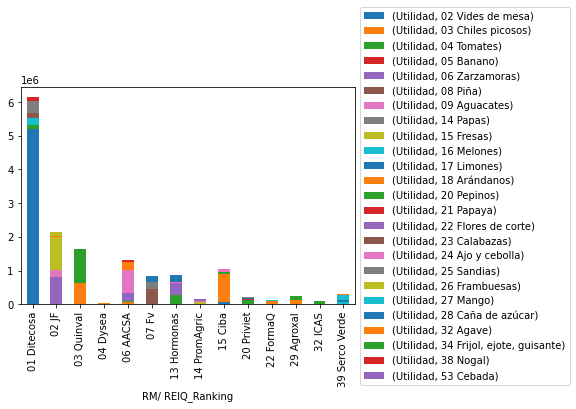

In [12]:

# Cito 2022 desglosado por cliente y cultivo
Utilidadporclienteycultivo = Ventas_zona_producto_cultivo_Cito_2022.groupby(
                                                                            ['RM/ REIQ_Ranking','Cultivo_ranking']
                                                                            ).agg(
                                                                            {'Utilidad': 'sum'}).reset_index()
Utilidadporclienteycultivo_ = Ventas_zona_producto_cultivo_Cito_2022.groupby(
                                                                            ['RM/ REIQ_Ranking','Cultivo_ranking']
                                                                            ).agg(
                                                                            {'Utilidad': 'sum'})
# Gráfica de barras
Utilidadporclienteycultivo_df = pd.DataFrame(Utilidadporclienteycultivo_.unstack(level = 1))
Utilidadporclienteycultivo_df.plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


# Listado de top 10 clientes y cultivos (Cito)

In [13]:
DetalleCito2022_ = Ventas_zona_producto_cultivo_Cito_2022.groupby(
                                                                ['Cultivo_Categoría','RM/ REIQ_Ranking']
                                                                ).agg(
                                                                {'Utilidad $M': 'sum', 'Volumen' : 'sum'})
DetalleCito2022_sorted_ = DetalleCito2022_.sort_values(by=['Utilidad $M'],ascending=False)
DetalleCito2022_sorted_.head(5)

Utilidad $M   Volumen
Cultivo_Categoría RM/ REIQ_Ranking                       
Vides             01 Ditecosa          5.201897  21757.60
Berries           02 JF                1.923399   6469.28
Hortalizas        03 Quinval           1.536902   6300.00
                  15 Ciba              0.949621   3555.00
Cucurbitácea      01 Ditecosa          0.711239   2980.60

In [14]:
print('${:,.3f} M'.format(DetalleCito2022_sorted_['Utilidad $M'].head(5).sum()))

$10.323 M


# Raíz/ Suelo, 2022

In [15]:

print ('${:,.3f} M'.format(
                            Ventas_zona_producto_cultivo_Suelo_2022['Utilidad'].sum()
                            /1000000)
      )
print ('%{:,.1f} '.format(
                            Ventas_zona_producto_cultivo_Suelo_2022['Utilidad'].sum()*100/
                            Ventas_zona_producto_cultivo_2022['Utilidad'].sum()) )

$10.923 M
%26.4 


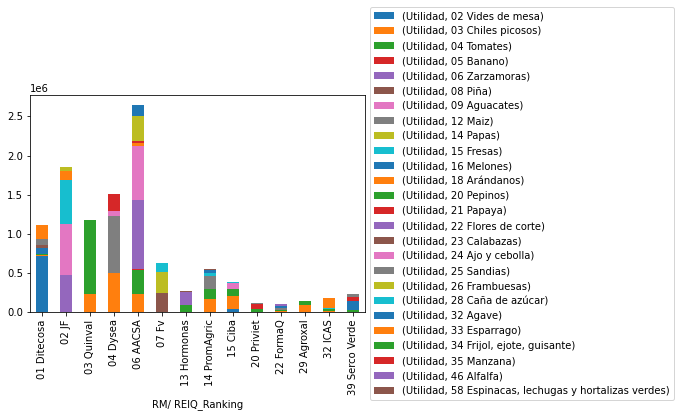

In [16]:
# Suelo 2022 desglosado por cliente y cultivo
UtilidadporclienteycultivoSuelo = Ventas_zona_producto_cultivo_Suelo_2022.groupby(
                                                                            ['RM/ REIQ_Ranking','Cultivo_ranking']
                                                                            ).agg(
                                                                            {'Utilidad': 'sum'}).reset_index()
UtilidadporclienteycultivoSuelo_ = Ventas_zona_producto_cultivo_Suelo_2022.groupby(
                                                                            ['RM/ REIQ_Ranking','Cultivo_ranking']
                                                                            ).agg(
                                                                            {'Utilidad': 'sum'})
# Gráfica de barras
UtilidadporclienteycultivoSuelo_df = pd.DataFrame(UtilidadporclienteycultivoSuelo_.unstack(level = 1))
UtilidadporclienteycultivoSuelo_df.plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


# Top 10 

In [17]:
DetalleSuelo2022 = Ventas_zona_producto_cultivo_Suelo_2022.groupby(
                                                                ['Cultivo_Categoría','RM/ REIQ_Ranking']
                                                                ).agg(
                                                                {'Utilidad $M': 'sum', 'Volumen' : 'sum'})
DetalleSuelo2022_sorted = DetalleSuelo2022.sort_values(by=['Utilidad $M'],ascending=False)
DetalleSuelo2022_sorted.head(10)

Utilidad $M  Volumen
Cultivo_Categoría       RM/ REIQ_Ranking                      
Berries                 06 AACSA             1.235525  11792.0
                        02 JF                1.206407  11521.5
Hortalizas              03 Quinval           0.975592  12132.0
Frutales siempre verdes 06 AACSA             0.726389   7671.0
Vides                   01 Ditecosa          0.723172   8415.0
Granos                  04 Dysea             0.715998  15000.0
Frutales siempre verdes 02 JF                0.649305   8445.0
Hortalizas              04 Dysea             0.571881   5800.0
                        06 AACSA             0.535417   4878.0
                        14 PromAgric         0.316315   2898.0

In [18]:
print('${:,.3f} M'.format(DetalleSuelo2022_sorted['Utilidad $M'].head(10).sum()))

$7.656 M


# Bioestimulante, 2022

In [19]:
print ('${:,.3f} M'.format(
                            Ventas_zona_producto_cultivo_Bioest_2022['Utilidad'].sum()
                            /1000000)
      )
print ('%{:,.1f} '.format(
                            Ventas_zona_producto_cultivo_Bioest_2022['Utilidad'].sum()*100/
                            Ventas_zona_producto_cultivo_2022['Utilidad'].sum()) )



$6.967 M
%16.8 


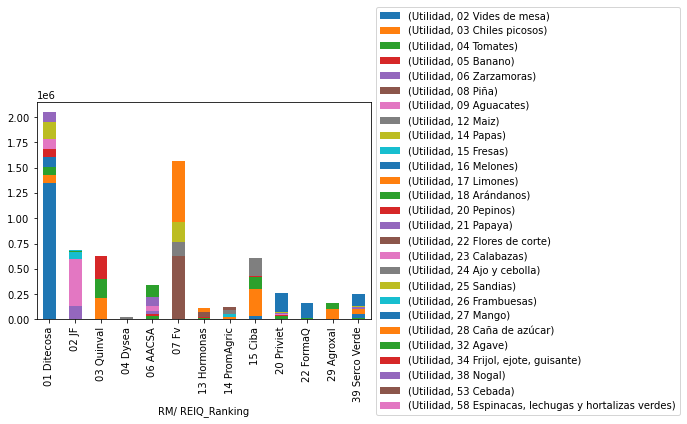

In [20]:
# Bioest 2022 desglosado por cliente y cultivo
UtilidadporclienteycultivoBioest = Ventas_zona_producto_cultivo_Bioest_2022.groupby(
                                                                            ['RM/ REIQ_Ranking','Cultivo_ranking']
                                                                            ).agg(
                                                                            {'Utilidad': 'sum'}).reset_index()
UtilidadporclienteycultivoBioest_ = Ventas_zona_producto_cultivo_Bioest_2022.groupby(
                                                                            ['RM/ REIQ_Ranking','Cultivo_ranking']
                                                                            ).agg(
                                                                            {'Utilidad': 'sum'})
# Gráfica de barras
UtilidadporclienteycultivoBioest_df = pd.DataFrame(UtilidadporclienteycultivoBioest_.unstack(level = 1))
UtilidadporclienteycultivoBioest_df.plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


# Top 10 

In [21]:
DetalleBioest2022 = Ventas_zona_producto_cultivo_Bioest_2022.groupby(
                                                                ['Cultivo_Categoría','RM/ REIQ_Ranking']
                                                                ).agg(
                                                                {'Utilidad $M': 'sum', 'Volumen' : 'sum'})
DetalleBioest2022_sorted = DetalleBioest2022.sort_values(by=['Utilidad $M'],ascending=False)
DetalleBioest2022_sorted.head(10)

,,Utilidad $M,Volumen
Cultivo_Categoría,RM/ REIQ_Ranking,,
Vides,01 Ditecosa,1.346029,24699.095744
Frutales siempre verdes,07 Fv,0.905969,10584.000000
Hortalizas,15 Ciba,0.566954,8581.000000
Frutales siempre verdes,02 JF,0.458133,4856.800000
Cucurbitácea,01 Ditecosa,0.449565,7772.000000
Hortalizas,03 Quinval,0.403233,6187.500000
Industriales,07 Fv,0.327033,3800.000000
Berries,02 JF,0.230791,2748.250000
Frutales siempre verdes,20 Priviet,0.216725,3370.000000


In [22]:
print('${:,.3f} M'.format(DetalleBioest2022_sorted['Utilidad $M'].head(10).sum()))

$5.101 M


# Coady 2022

In [23]:
print ('${:,.3f} M'.format(
                            Ventas_zona_producto_cultivo_Coady_2022['Utilidad'].sum()
                            /1000000)
      )
print ('%{:,.1f} '.format(
                            Ventas_zona_producto_cultivo_Coady_2022['Utilidad'].sum()*100/
                            Ventas_zona_producto_cultivo_2022['Utilidad'].sum()) )


$6.087 M
%14.7 


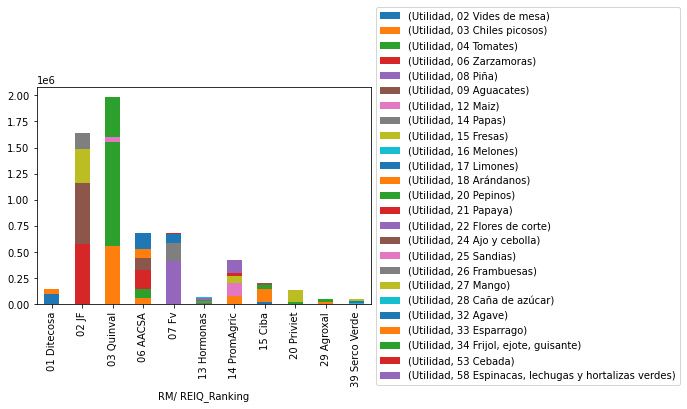

In [24]:
# Bioest 2022 desglosado por cliente y cultivo
UtilidadporclienteycultivoCoady = Ventas_zona_producto_cultivo_Coady_2022.groupby(
                                                                            ['RM/ REIQ_Ranking','Cultivo_ranking']
                                                                            ).agg(
                                                                            {'Utilidad': 'sum'}).reset_index()
UtilidadporclienteycultivoCoady_ = Ventas_zona_producto_cultivo_Coady_2022.groupby(
                                                                            ['RM/ REIQ_Ranking','Cultivo_ranking']
                                                                            ).agg(
                                                                            {'Utilidad': 'sum'})
# Gráfica de barras
UtilidadporclienteycultivoCoady_df = pd.DataFrame(UtilidadporclienteycultivoCoady_.unstack(level = 1))
UtilidadporclienteycultivoCoady_df.plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# Anexo: Resumen por cliente y horizonte

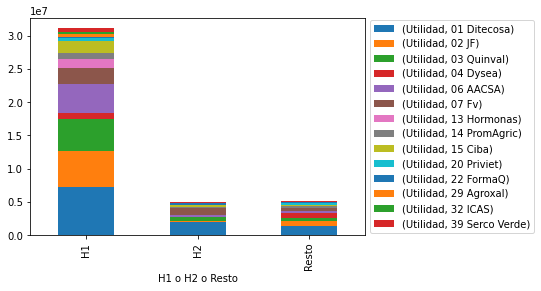

In [25]:
# Plan 2022 desglosado por cliente y horizonte

Utilidadporclienteyhorizonte_ = Ventas_zona_producto_cultivo_2022.groupby(
                                                ['H1 o H2 o Resto','RM/ REIQ_Ranking']
                                        ).agg(
                                                {'Utilidad': 'sum'})
# Gráfica de barras
pd.DataFrame(Utilidadporclienteyhorizonte_.unstack(level = 1)).plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()



#  Anexo: Resumen por producto

In [26]:
Producto_ = Ventas_zona_producto_cultivo_2022.groupby(
                                                ['Administracion de la categoria','H1 o H2 o Resto','Producto_Ranking']
                                        ).agg({'Utilidad $M': 'sum'}).style.bar(subset=['Utilidad $M'], color='red')
display(Producto_)

# Anexo: Resumen  por cliente

In [27]:
Zona_ = Ventas_zona_producto_cultivo_2022.groupby(
                                            ['RM/ REIQ_Ranking','RM/ REIQ_x']
                                    ).agg({'Utilidad $M': 'sum'}).sort_values(by=['Utilidad $M'], ascending = False).style.bar(subset=['Utilidad $M'], color='red')
display(Zona_)

,,Utilidad $M
RM/ REIQ_Ranking,RM/ REIQ_x,
01 Ditecosa,Ditecosa,10.547405
02 JF,JF,6.336185
03 Quinval,Quinval,6.036651
06 AACSA,AACSA,4.965515
07 Fv,Fv,3.924628
15 Ciba,Ciba,2.252365
04 Dysea,Dysea,1.608853
13 Hormonas,Hormonas,1.341628
14 PromAgric,PromAgric,1.297800


# Anexo: Por cultivo

In [28]:
Cultivos= Cultivo[(Cultivo['Cultivo_Categoría'] != "-") & (Cultivo['Cultivo_Categoría'] != "Otros")]
Ventas_zona_producto_cultivo_2022_= Ventas_zona_producto_cultivo_2022[Ventas_zona_producto_cultivo_2022['Cultivo_Categoría_Ranking'] != "-"]


Cultivo_ = Ventas_zona_producto_cultivo_2022_.groupby(
                                                ['Cultivo_Categoría_Ranking']
                                                ).agg({'Utilidad $M': 'sum'},{'Utilidad/Utilidad_total (%)': 'sum'}).sort_values(by=['Cultivo_Categoría_Ranking','Utilidad $M'], ascending = True).style.bar(subset=['Utilidad $M'], color='red')
display(Cultivo_)

,Utilidad $M
Cultivo_Categoría_Ranking,
02 Frutales siempre verdes,7.089252
03 Hortalizas,11.927469
04 Vides,8.096042
05 Berries,6.651329
06 Granos,1.390811
08 Industriales,1.163360
09 Cucurbitácea,3.359942
10 Frutal caducifolio,0.555859
11 Ornamental,0.597518


In [29]:
Cultivos= Cultivo[(Cultivo['Cultivo_Categoría'] != "-") & (Cultivo['Cultivo_Categoría'] != "Otros")]
Ventas_zona_producto_cultivo_2022_= Ventas_zona_producto_cultivo_2022[Ventas_zona_producto_cultivo_2022['Cultivo_Categoría_Ranking'] != "-"]


Cultivo_ = Ventas_zona_producto_cultivo_2022_.groupby(
                                                ['Cultivo_Categoría_Ranking']
                                                ).agg({'Utilidad $M': 'sum'},{'Utilidad/Utilidad_total (%)': 'sum'}).sort_values(by=['Cultivo_Categoría_Ranking','Utilidad $M'], ascending = True).style.bar(subset=['Utilidad $M'], color='red')
display(Cultivo_)

,Utilidad $M
Cultivo_Categoría_Ranking,
02 Frutales siempre verdes,7.089252
03 Hortalizas,11.927469
04 Vides,8.096042
05 Berries,6.651329
06 Granos,1.390811
08 Industriales,1.163360
09 Cucurbitácea,3.359942
10 Frutal caducifolio,0.555859
11 Ornamental,0.597518
